In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from catboost import CatBoostClassifier
import plotly.graph_objects as go
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import matplotlib.cm as cm
import pickle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
# Load the dataset
df = pd.read_csv("C:/Users/Yassine Lahniche/Downloads/processed_obesity_dataset.csv")
# Prepare features and target
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X, y = undersampler.fit_resample(X, y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
NObeyesdad
2    196
0    196
4    196
3    196
6    196
1    196
5    196
Name: count, dtype: int64

Test set class distribution:
NObeyesdad
2    49
0    49
3    49
6    49
1    49
5    49
4    49
Name: count, dtype: int64


In [29]:
# Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# CatBoost Classifier
print("Training CatBoost Classifier...")
catboost_model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, random_state=42, verbose=False)
catboost_model.fit(X_train, y_train)

# Baseline XGBoost Classifier
print("Training Baseline XGBoost Classifier...")
xgb_baseline = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=6,  # Specify the number of classes
    random_state=42
)
xgb_baseline.fit(X_train, y_train)

Training Random Forest Classifier...
Training CatBoost Classifier...
Training Baseline XGBoost Classifier...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [30]:
# Make predictions
y1_pred = rf_model.predict(X_test)
y2_pred = catboost_model.predict(X_test)
y3_pred = xgb_baseline.predict(X_test)

# Function to evaluate models
def evaluate_model(y_true, preds, model_name):
    accuracy = accuracy_score(y_true, preds)
    precision = precision_score(y_true, preds, average="weighted")
    recall = recall_score(y_true, preds, average="weighted")
    f1 = f1_score(y_true, preds, average="weighted")

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 30)

# Evaluate each model
evaluate_model(y_test, y1_pred, "Random Forest")
evaluate_model(y_test, y2_pred, "CatBoost")
evaluate_model(y_test, y3_pred, "XGBoost Baseline")


Metrics for Random Forest:
Accuracy: 0.9475
Precision: 0.9490
Recall: 0.9475
F1-Score: 0.9478
------------------------------
Metrics for CatBoost:
Accuracy: 0.9446
Precision: 0.9462
Recall: 0.9446
F1-Score: 0.9446
------------------------------
Metrics for XGBoost Baseline:
Accuracy: 0.9708
Precision: 0.9714
Recall: 0.9708
F1-Score: 0.9710
------------------------------


In [31]:
print(classification_report(y_test, y1_pred))
print(classification_report(y_test, y2_pred))
print(classification_report(y_test, y3_pred))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.87      0.94      0.90        49
           2       1.00      0.98      0.99        49
           3       0.98      1.00      0.99        49
           4       1.00      1.00      1.00        49
           5       0.88      0.90      0.89        49
           6       0.91      0.88      0.90        49

    accuracy                           0.95       343
   macro avg       0.95      0.95      0.95       343
weighted avg       0.95      0.95      0.95       343

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.91      0.84      0.87        49
           2       1.00      0.96      0.98        49
           3       0.94      1.00      0.97        49
           4       1.00      1.00      1.00        49
           5       0.85      0.94      0.89        49
           6       0.98 


XGBoost Classifier Prediction Distribution
Prediction Distribution:
5    0.151603
2    0.142857
3    0.142857
6    0.142857
4    0.142857
0    0.139942
1    0.137026
Name: proportion, dtype: float64


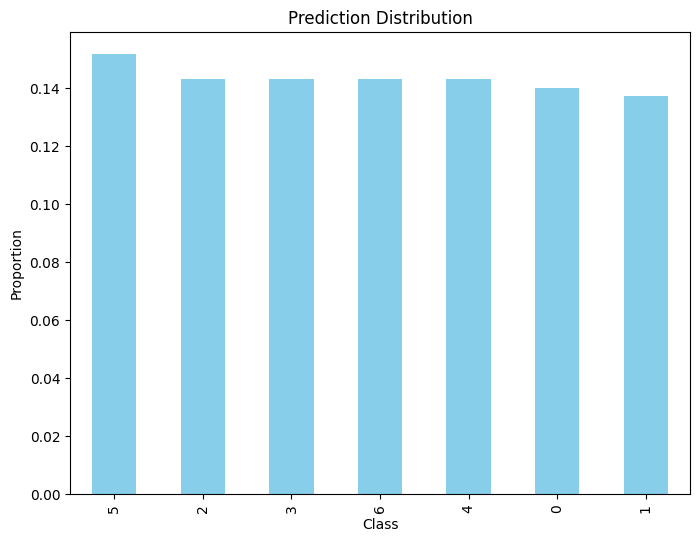

In [32]:
import pandas as pd

# Function to analyze prediction distribution
def analyze_predictions(model, X_test):
    y_pred = model.predict(X_test)
    pred_distribution = pd.Series(y_pred).value_counts(normalize=True)
    
    print("Prediction Distribution:")
    print(pred_distribution)
    
    # Plot distribution
    plt.figure(figsize=(8, 6))
    pred_distribution.plot(kind='bar', color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Proportion')
    plt.title('Prediction Distribution')
    plt.show()



print("\nXGBoost Classifier Prediction Distribution")
analyze_predictions(xgb_baseline, X_test)

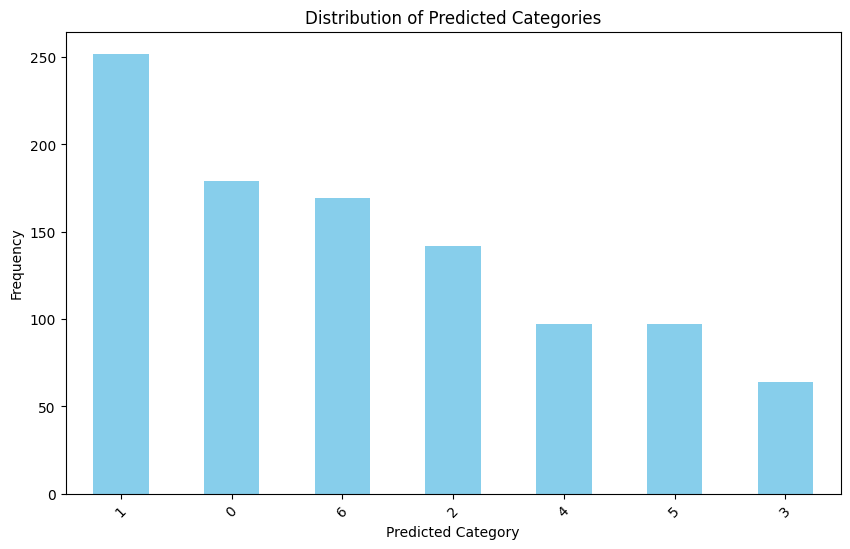

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model = xgb_baseline

# Generate random data for 1000 samples using the correct feature names
np.random.seed(42)
n_samples = 1000

data = {
    "Gender": np.random.randint(0, 2, n_samples),  # 0: Male, 1: Female
    "Age": np.random.randint(18, 65, n_samples),
    "Height": np.random.uniform(150, 190, n_samples),
    "Weight": np.random.uniform(50, 120, n_samples),
    "family_history_with_overweight": np.random.randint(0, 2, n_samples),  # 0: No, 1: Yes
    "FAVC": np.random.randint(0, 2, n_samples),  # 0: No, 1: Yes (High caloric food)
    "FCVC": np.random.randint(1, 4, n_samples),  # 1-3 (Vegetable consumption frequency)
    "NCP": np.random.randint(1, 4, n_samples),  # 1-3 (Number of main meals)
    "CAEC": np.random.randint(0, 4, n_samples),  # 0: Never, 1: Sometimes, 2: Frequently, 3: Always (Snacking)
    "SMOKE": np.random.randint(0, 2, n_samples),  # 0: No, 1: Yes
    "CH2O": np.random.randint(1, 4, n_samples),  # 1-3 (Water intake)
    "SCC": np.random.randint(0, 2, n_samples),  # 0: No, 1: Yes (Calorie monitoring)
    "FAF": np.random.randint(0, 4, n_samples),  # 0-3 (Physical activity frequency)
    "TUE": np.random.randint(0, 4, n_samples),  # 0-3 (Screen time)
    "CALC": np.random.randint(0, 4, n_samples),  # 0: Never, 1: Sometimes, 2: Frequently, 3: Always (Alcohol consumption)
    "MTRANS": np.random.randint(0, 5, n_samples)  # 0: Automobile, 1: Public Transportation, 2: Motorbike, 3: Bike, 4: Walking
}

df = pd.DataFrame(data)

# Make predictions (assuming the model is already trained)
# Replace this with your actual model's prediction method
predictions = model.predict(df)

# Add predictions to the DataFrame
df['Prediction'] = predictions

# Translate encoded values to human-readable format
def get_readable_values(input_data):
    gender_map = {0: "Male", 1: "Female"}
    yes_no_map = {0: "No", 1: "Yes"}
    veggie_map = {1: "Never", 2: "Sometimes", 3: "Always"}  # FCVC
    meals_map = {1: "1-2", 2: "3", 3: ">3"}  # NCP
    frequency_map = {0: "Never", 1: "Sometimes", 2: "Frequently", 3: "Always"}  # CAEC, CALC
    water_map = {1: "Less than 1L", 2: "1-2L", 3: "More than 2L"}  # CH2O
    activity_map = {0: "Never", 1: "Once or twice a week", 2: "Two or three times a week", 3: "More than three times a week"}  # FAF
    screen_map = {0: "None", 1: "Less than 1h", 2: "1-3h", 3: "More than 3h"}  # TUE
    transport_map = {0: "Automobile", 1: "Public Transportation", 2: "Motorbike", 3: "Bike", 4: "Walking"}  # MTRANS

    input_data['Gender'] = input_data['Gender'].map(gender_map)
    input_data['family_history_with_overweight'] = input_data['family_history_with_overweight'].map(yes_no_map)
    input_data['FAVC'] = input_data['FAVC'].map(yes_no_map)
    input_data['FCVC'] = input_data['FCVC'].map(veggie_map)
    input_data['NCP'] = input_data['NCP'].map(meals_map)
    input_data['CAEC'] = input_data['CAEC'].map(frequency_map)
    input_data['SMOKE'] = input_data['SMOKE'].map(yes_no_map)
    input_data['CH2O'] = input_data['CH2O'].map(water_map)
    input_data['SCC'] = input_data['SCC'].map(yes_no_map)
    input_data['FAF'] = input_data['FAF'].map(activity_map)
    input_data['TUE'] = input_data['TUE'].map(screen_map)
    input_data['CALC'] = input_data['CALC'].map(frequency_map)
    input_data['MTRANS'] = input_data['MTRANS'].map(transport_map)

    return input_data

# Convert the DataFrame to human-readable format
df_readable = get_readable_values(df.copy())

# Visualize the distribution of the predicted categories
plt.figure(figsize=(10, 6))
df_readable['Prediction'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Predicted Categories')
plt.xlabel('Predicted Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("C:/Users/Yassine Lahniche/Downloads/processed_obesity_dataset.csv")

# Prepare features and target
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='ovr')  # Increase max_iter if convergence issues occur

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        49
           1       0.79      0.62      0.69        55
           2       0.69      0.72      0.70        67
           3       0.86      0.98      0.92        57
           4       1.00      1.00      1.00        61
           5       0.68      0.73      0.71        56
           6       0.62      0.57      0.60        54

    accuracy                           0.79       399
   macro avg       0.79      0.79      0.79       399
weighted avg       0.79      0.79      0.79       399


Confusion Matrix:
[[46  3  0  0  0  0  0]
 [ 4 34  2  0  0 10  5]
 [ 0  0 48  9  0  2  8]
 [ 0  0  1 56  0  0  0]
 [ 0  0  0  0 61  0  0]
 [ 0  3  6  0  0 41  6]
 [ 0  3 13  0  0  7 31]]


C:\Users\Yassine Lahniche\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
